In [ ]:
from pathlib import Path
import pandas as pd
import numpy  as np

# Leggiamo i dati di APPA

Caricamento dei file csv in un dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data_folder = Path("/content/drive/MyDrive/data")

In [ ]:
appa = pd.read_csv(
    data_folder / "DataSet_APPA/processed/appa_data.csv", parse_dates=["Data"]
)
appa

,Data,Stazione,Inquinante,Valore,Unità di misura
0,2018-12-01 01:00:00,Parco S. Chiara,PM10,52.0,µg/mc
1,2018-12-01 02:00:00,Parco S. Chiara,PM10,143.0,µg/mc
2,2018-12-01 03:00:00,Parco S. Chiara,PM10,76.0,µg/mc
3,2018-12-01 04:00:00,Parco S. Chiara,PM10,44.0,µg/mc
4,2018-12-01 05:00:00,Parco S. Chiara,PM10,42.0,µg/mc
...,...,...,...,...,...
3178233,2013-07-31 20:00:00,A22 (Avio),Ossido di Carbonio,0.5,mg/mc
3178234,2013-07-31 21:00:00,A22 (Avio),Ossido di Carbonio,0.6,mg/mc
3178235,2013-07-31 22:00:00,A22 (Avio),Ossido di Carbonio,0.5,mg/mc
3178236,2013-07-31 23:00:00,A22 (Avio),Ossido di Carbonio,0.6,mg/mc


## Controlliamo le statistiche dei dati

Controlliamo per ogni stazione la data della prima rilevazione, di fine e il numero di records

In [ ]:
appa.groupby("Stazione").Data.agg(["min", "max", "count"])
# appa.groupby("Inquinante").Data.agg(["min", "max", "count"])

,min,max,count
Stazione,,,
A22 (Avio),2008-04-04 11:00:00,2024-01-02,398388
Borgo Valsugana,2011-01-01 01:00:00,2024-01-02,447300
Monte Gaza,2013-01-03 17:00:00,2024-01-02,284321
Parco S. Chiara,2011-01-01 01:00:00,2024-01-02,571282
Piana Rotaliana,2011-01-01 01:00:00,2024-01-02,337652
Riva del Garda,2011-01-01 01:00:00,2024-01-02,343214
Rovereto,2011-01-01 01:00:00,2024-01-02,453390
Via Bolzano,2011-01-01 01:00:00,2024-01-02,342691


Raggruppiamo anche per inquinante in modo da poter osservare gli intervalli di rilevazione dei singoli inquinanti.

In [ ]:
appa.groupby("Inquinante").Data.agg(["min", "max", "count"])

,min,max,count
Inquinante,,,
Biossido Zolfo,2011-01-01 01:00:00,2024-01-02,114275
Biossido di Azoto,2008-04-04 11:00:00,2024-01-02,915441
Ossido di Carbonio,2008-06-17 18:00:00,2024-01-02,248313
Ozono,2011-01-01 01:00:00,2024-01-02,666598
PM10,2008-06-17 18:00:00,2024-01-02,904969
PM2.5,2011-01-01 01:00:00,2024-01-02,328642


Raggruppiamo per inquinante e per stazione.

In [ ]:
appa.groupby(["Stazione", "Inquinante"]).Data.agg(["min", "max", "count"])

min        max   count
Stazione        Inquinante                                               
A22 (Avio)      Biossido di Azoto  2008-04-04 11:00:00 2024-01-02  136027
                Ossido di Carbonio 2008-06-17 18:00:00 2024-01-02  134493
                PM10               2008-06-17 18:00:00 2024-01-02  127868
Borgo Valsugana Biossido di Azoto  2011-01-01 01:00:00 2024-01-02  114216
                Ozono              2011-01-01 01:00:00 2024-01-02  113632
                PM10               2011-01-01 01:00:00 2024-01-02  113944
                PM2.5              2011-03-12 01:00:00 2024-01-02  105508
Monte Gaza      Biossido di Azoto  2013-01-03 17:00:00 2024-01-02   94608
                Ozono              2013-01-03 17:00:00 2024-01-02   95765
                PM10               2013-01-03 17:00:00 2024-01-02   93948
Parco S. Chiara Biossido Zolfo     2011-01-01 01:00:00 2024-01-02  114275
                Biossido di Azoto  2011-01-01 01:00:00 2024-01-02  114205
                Ozono              2011-01-01 01:00:00 2024-01-02  114475
                PM10               2011-01-01 01:00:00 2024-01-02  114994
                PM2.5              2011-01-01 01:00:00 2024-01-02  113333
Piana Rotaliana Biossido di Azoto  2011-01-01 01:00:00 2024-01-02  112853
                Ozono              2011-01-01 01:00:00 2024-01-02  113212
                PM10               2011-01-01 01:00:00 2024-01-02  111587
Riva del Garda  Biossido di Azoto  2011-01-01 01:00:00 2024-01-02  114349
                Ozono              2011-01-01 01:00:00 2024-01-02  114705
                PM10               2011-01-01 01:00:00 2024-01-02  114160
Rovereto        Biossido di Azoto  2011-01-01 01:00:00 2024-01-02  114589
                Ozono              2011-01-01 01:00:00 2024-01-02  114809
                PM10               2011-01-01 01:00:00 2024-01-02  114191
                PM2.5              2011-03-04 06:00:00 2024-01-02  109801
Via Bolzano     Biossido di Azoto  2011-01-01 01:00:00 2024-01-02  114594
                Ossido di Carbonio 2011-01-01 01:00:00 2024-01-02  113820
                PM10               2011-01-01 01:00:00 2024-01-02  114277

# Selezioniamo una singola stazione

Visualizziamo tutti i dati presenti nel dataframe

In [ ]:
appa

,Data,Stazione,Inquinante,Valore,Unità di misura
0,2018-12-01 01:00:00,Parco S. Chiara,PM10,52.0,µg/mc
1,2018-12-01 02:00:00,Parco S. Chiara,PM10,143.0,µg/mc
2,2018-12-01 03:00:00,Parco S. Chiara,PM10,76.0,µg/mc
3,2018-12-01 04:00:00,Parco S. Chiara,PM10,44.0,µg/mc
4,2018-12-01 05:00:00,Parco S. Chiara,PM10,42.0,µg/mc
...,...,...,...,...,...
3178233,2013-07-31 20:00:00,A22 (Avio),Ossido di Carbonio,0.5,mg/mc
3178234,2013-07-31 21:00:00,A22 (Avio),Ossido di Carbonio,0.6,mg/mc
3178235,2013-07-31 22:00:00,A22 (Avio),Ossido di Carbonio,0.5,mg/mc
3178236,2013-07-31 23:00:00,A22 (Avio),Ossido di Carbonio,0.6,mg/mc


Scegliamo una stazione, per esempio la Piana Rotaliana e grafichiamo la concentrazione di inquinante in funzione del tempo. Potete provare a cambiare stazione.



```
station = "Piana Rotaliana"


for g_id, g in appa[appa.Stazione == station].groupby(["Inquinante"]):
    g.plot.scatter(
        x="Data",
        y="Valore",
        figsize=(10, 3),
        title=g_id[0],
        alpha=0.05,
        marker=".",
    )
```



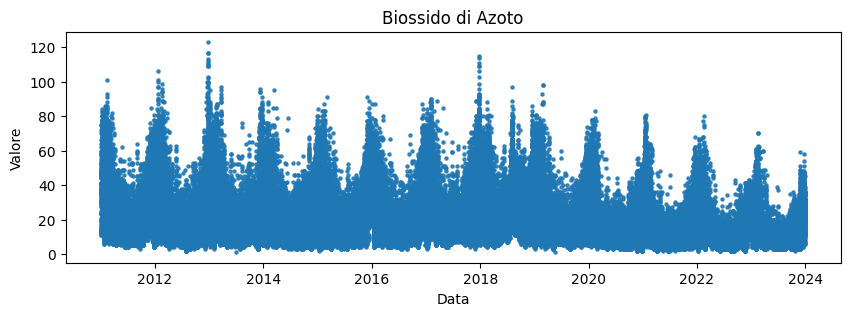

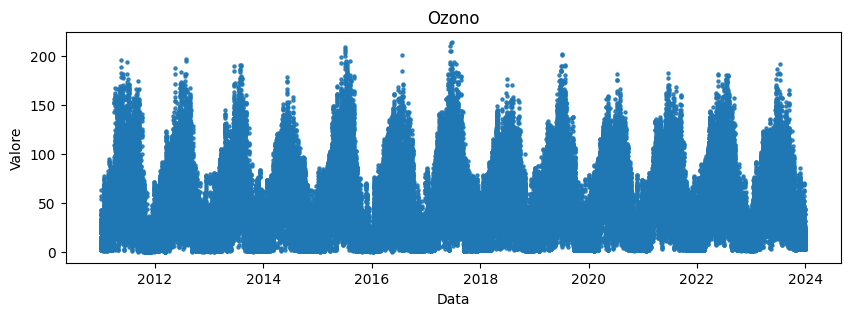

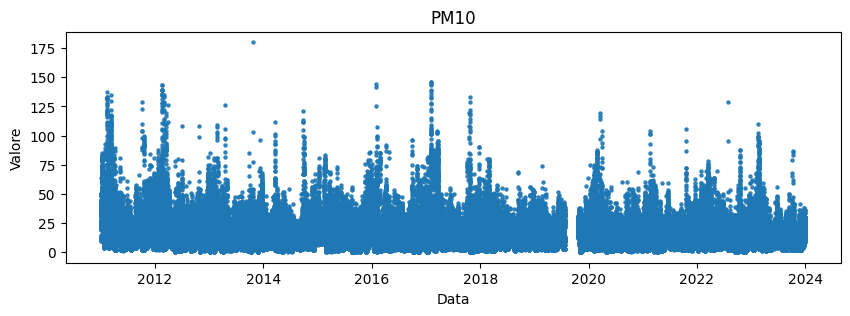

In [ ]:
station = "Piana Rotaliana"


for g_id, g in appa[appa.Stazione == station].groupby(["Inquinante"]):
    g.plot.scatter(
        x="Data",
        y="Valore",
        figsize=(10, 3),
        title=g_id[0],
        alpha=0.85,
        marker=".",
    )

## Visualizziamo i dati giornalieri, settimanali, mensili, annuali

`appa.Stazione == station` serve per filtrare

`resample("W")` serve per raggruppare settimanalmente

```python
for g_id, g in appa[appa.Stazione == station].groupby(["Inquinante"]):
    g.set_index("Data").resample("W").mean("Valore").reset_index().plot(
        x="Data",
        y="Valore",
        figsize=(12, 3),
        title=g_id[0],
        alpha=0.5,
        marker=".",
    )
```

Provate ore a raggrupare i dati giornalmente (D), settimanalmente (W), mensilmente (M), annualmente (Y).

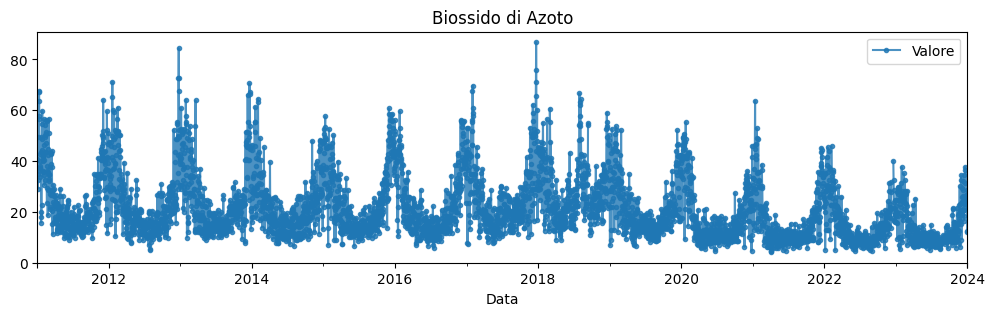

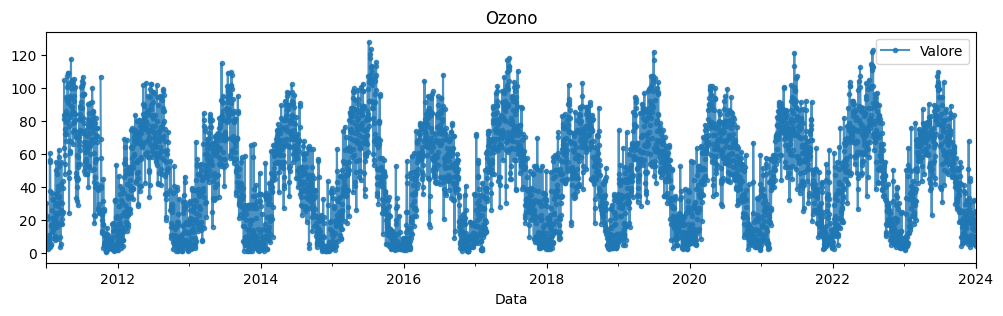

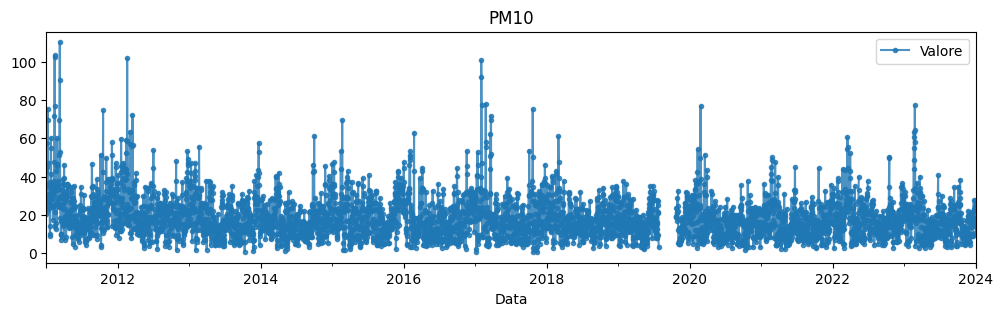

In [ ]:
for g_id, g in appa[appa.Stazione == station].groupby(["Inquinante"]):
    g.set_index("Data").resample("D").mean("Valore").reset_index().plot(
        x="Data",
        y="Valore",
        figsize=(12, 3),
        title=g_id[0],
        alpha=0.8,
        marker=".",
    )

## Osservazioni

Aggiungete pure le vostre eventuali osservazioni sui dati

# Selezioniamo un singolo inquinante
Provate a visualizzare i dati per uno stesso inquinante in stazioni diverse modificando il codice precedente.



```
station = nome stazione

for g_id, g in appa[appa.Stazione == station].groupby(["Inquinante"]):
    g.plot.scatter(
        x="Data",
        y="Valore",
        figsize=(10, 3),
        title=g_id[0],
        alpha=0.05,
        marker=".",
    )
```



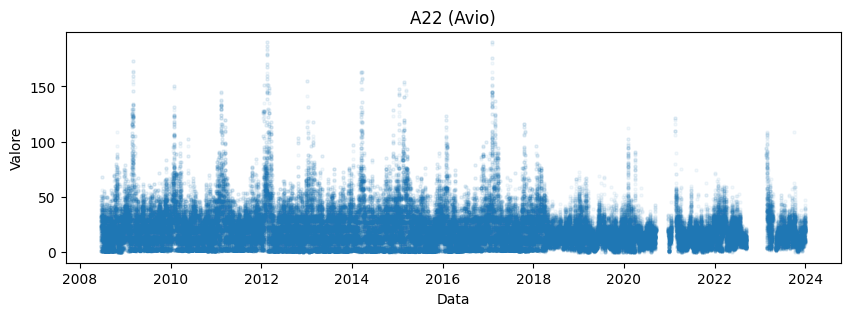

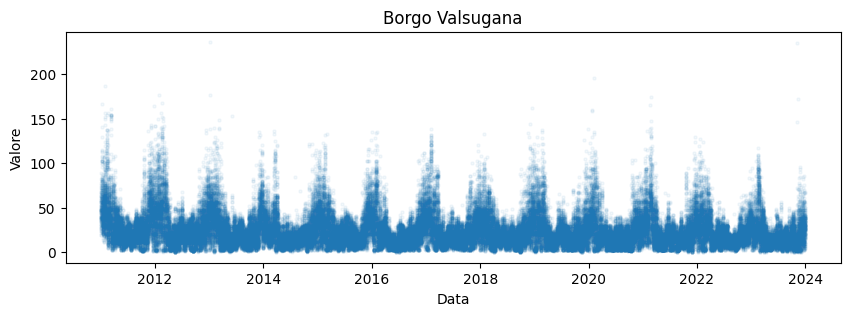

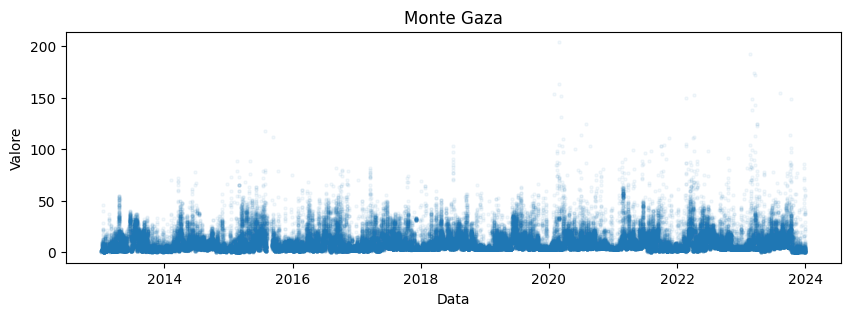

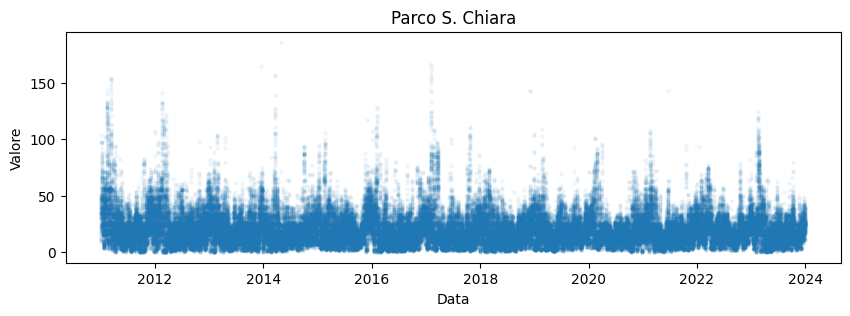

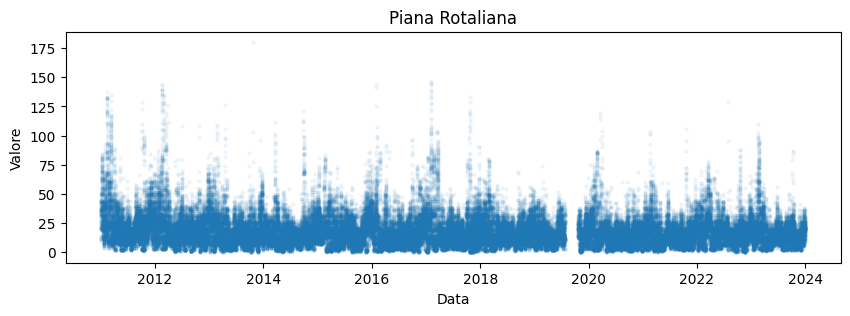

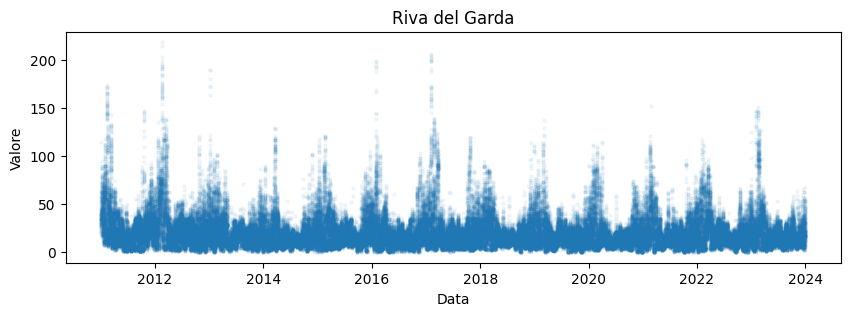

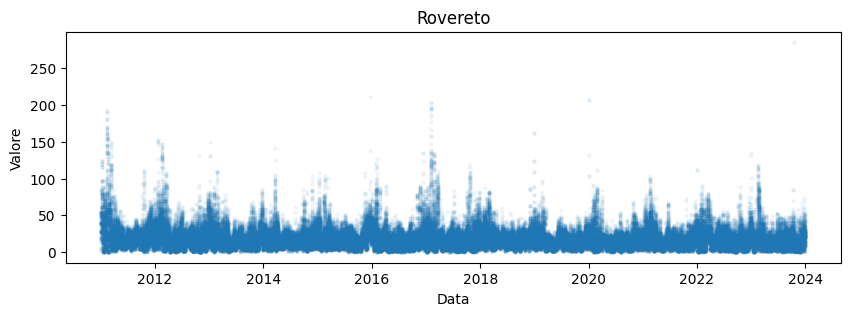

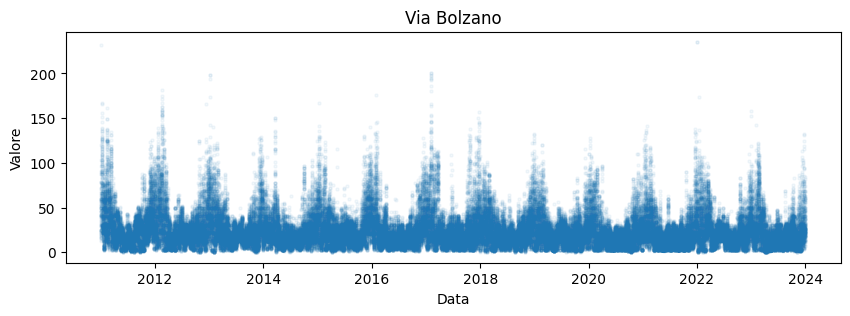

In [ ]:
pol="PM10"
for g_id, g in appa[appa.Inquinante == pol].groupby(["Stazione"]):
    g.plot.scatter(
        x="Data",
        y="Valore",
        figsize=(10, 3),
        title=g_id[0],
        alpha=0.05,
        marker=".",
    )

Ora possiamo provare nei grafici precenti a zoomare su un dato intervallo temporale e ad aggiungere una linea orizzontale che rappresenta il valore soglia di PM10



```
pol = "PM10"

for g_id, g in appa[appa.Inquinante == pol].groupby("Stazione"):
    g = (
        g.sort_values("Data")
        .set_index("Data")
        .loc["2023-01-01":"2023-12-31"]
        .reset_index()
    )
    
    ax = g.plot.scatter(
        x="Data",
        y="Valore",
        figsize=(10, 3),
        title=g_id,
        alpha=0.05,
        marker=".",
        # # use global maximum to compare stations
        # ylim=(-5, appa.loc[appa.Inquinante == pol, "Valore"].max())
    )

    ax.axhline(50, c="r", linestyle=":")

```








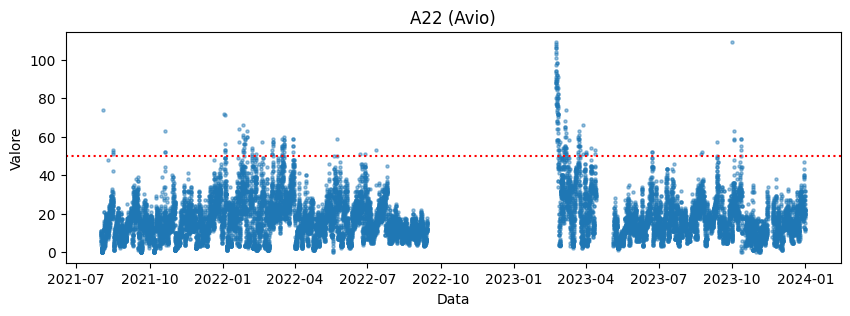

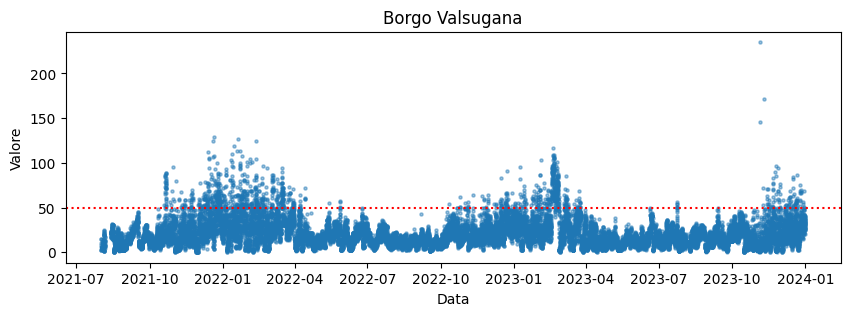

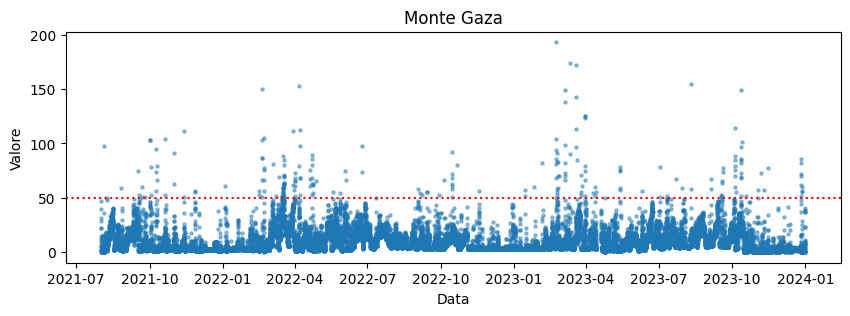

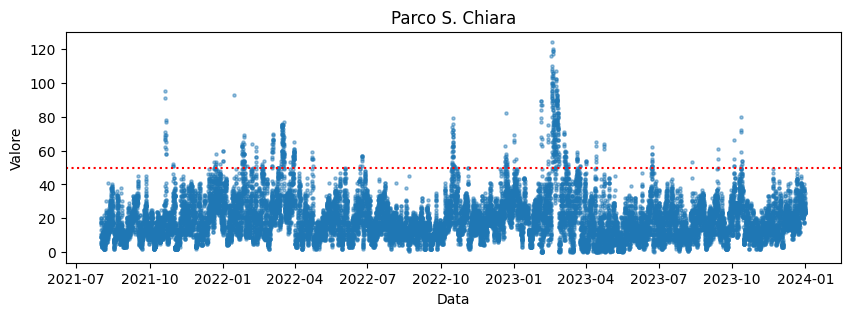

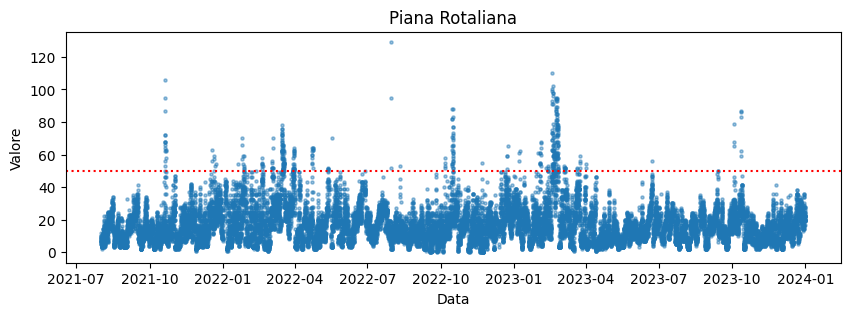

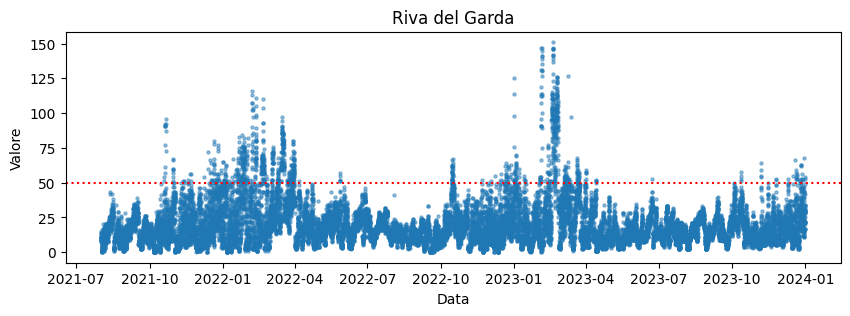

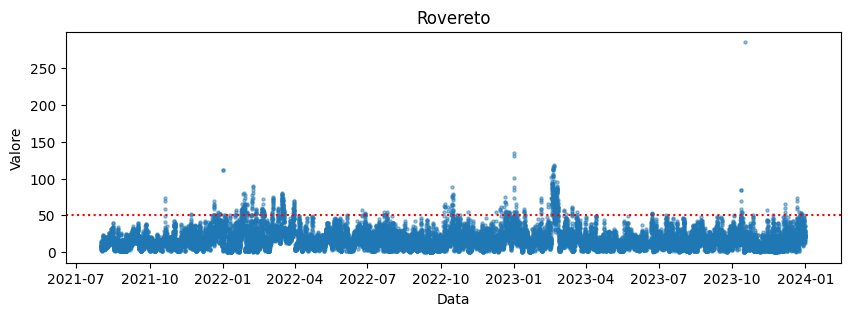

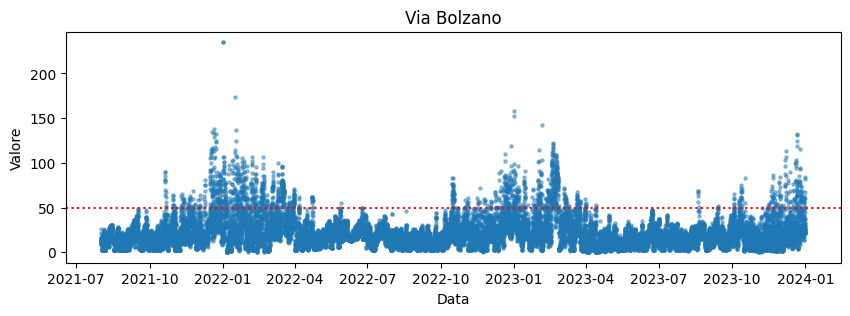

In [ ]:
pol = "PM10"

for g_id, g in appa[appa.Inquinante == pol].groupby("Stazione"):
    g = (
        g.sort_values("Data")
        .set_index("Data")
        .loc["2021-08-01":"2023-12-31"]
        .reset_index()
    )

    ax = g.plot.scatter(
        x="Data",
        y="Valore",
        figsize=(10, 3),
        title=g_id,
        alpha=0.45,
        marker=".",
        # # use global maximum to compare stations
        # ylim=(-5, appa.loc[appa.Inquinante == pol, "Valore"].max())
    )

    ax.axhline(50, c="r", linestyle=":")

## Visualizziamo i dati giornalieri, settimanali, mensili e annuali mettendo in uno stesso grafico min, max e media



```
pol = "PM10"

for g_id, g in appa[appa.Inquinante == pol].groupby("Stazione"):
    g = (
        g.sort_values("Data")
        .set_index("Data")
        .resample("M")
        .Valore
        .agg(["mean", "max", "min"])
    )

    ax = g.plot.line(
        figsize=(10, 3),
        title=g_id,
    )
```



<ipython-input-42-fef45c1c2580>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
<ipython-input-42-fef45c1c2580>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
<ipython-input-42-fef45c1c2580>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
<ipython-input-42-fef45c1c2580>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
<ipython-input-42-fef45c1c2580>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
<ipython-input-42-fef45c1c2580>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")
<ipython-input-42-fef45c1c2580>:7: FutureWarning: 'M' is deprecated and will be removed in a f

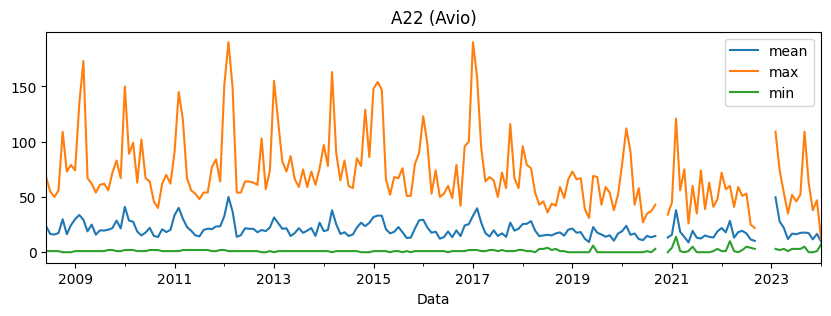

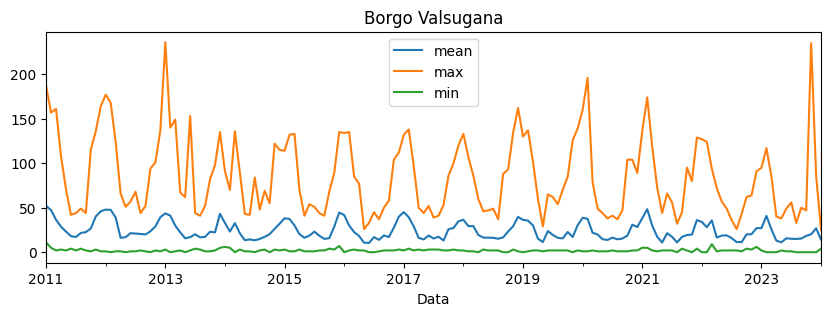

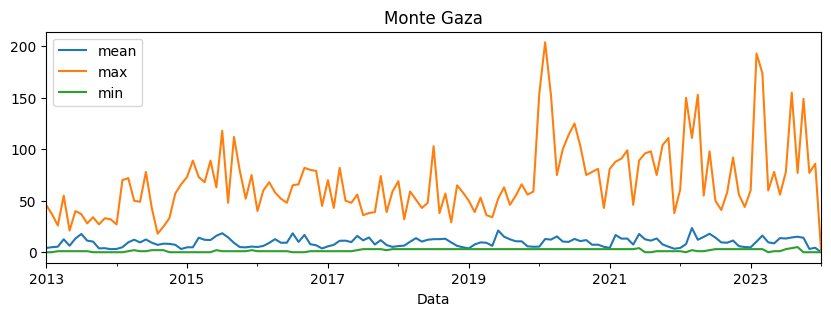

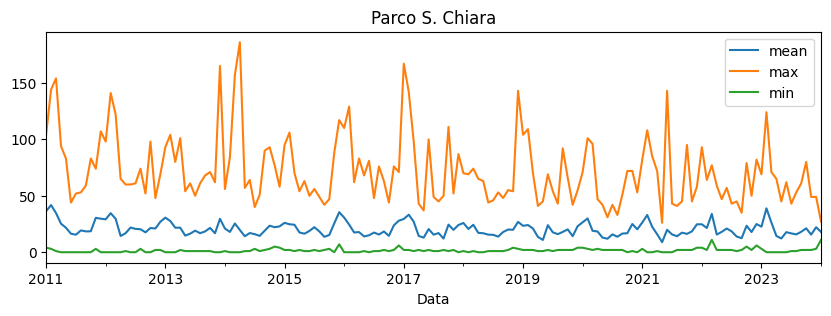

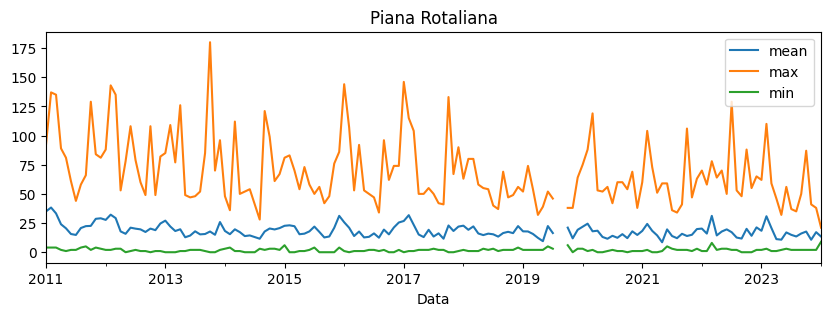

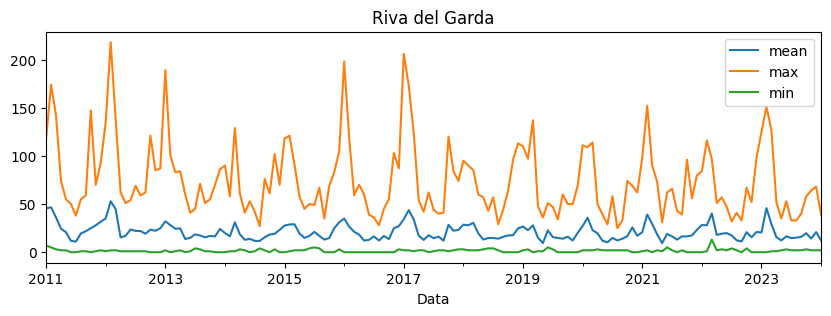

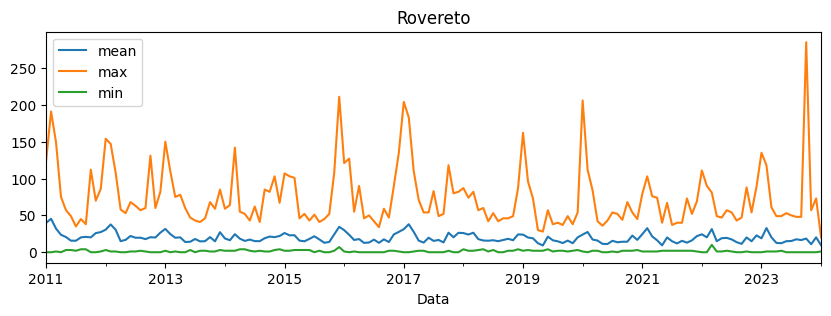

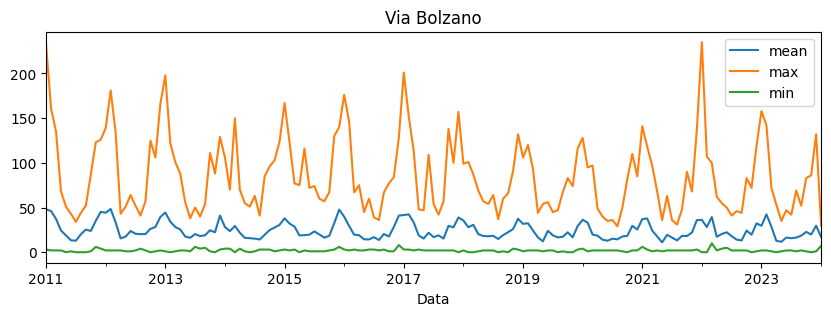

In [ ]:
pol = "PM10"

for g_id, g in appa[appa.Inquinante == pol].groupby("Stazione"):
    g = (
        g.sort_values("Data")
        .set_index("Data")
        .resample("M")
        .Valore
        .agg(["mean", "max", "min"])
    )

    ax = g.plot.line(
        figsize=(10, 3),
        title=g_id,
    )


## Osservazioni

Riportate le vostre eventuali osservazioni

# Piana Rotaliana e PM10

Decidiamo di lavorare sulla stazione Piana Rotaliana per riuscire a prevedere il PM10.

Andiamo a vedere quante volte viene superata una determinata soglia e calcoliamo la percentuale di superamento della soglia.

```
soglia = 50

rotaliana = appa[
    (appa.Stazione == "Piana Rotaliana")
    & (appa.Inquinante == "PM10")
]


superamento = appa[
    (appa.Stazione == "Piana Rotaliana")
    & (appa.Inquinante == "PM10")
    & (appa.Valore > soglia)
]
```

Per vedere la lunghezza di un dataframe si utilizza il comando


```
print(len(nome_dataframe))

```


In [ ]:
soglia = 100

rotaliana = appa[
    (appa.Stazione == "Piana Rotaliana")
    & (appa.Inquinante == "PM10")
]


superamento = appa[
    (appa.Stazione == "Piana Rotaliana")
    & (appa.Inquinante == "PM10")
    & (appa.Valore > soglia)
]
print(len(rotaliana))
print(len(superamento))

print(len(superamento)/len(rotaliana)*100)

111587
174
0.15593214263310243


In Italia il parametro della valutazione di PM10 è la **media giornaliera**: secondo il D. Lgs. 155/2010 questo limite è pari a 50 µg/mc, da non superare più di **35 volte per anno civile**. Nello stesso decreto viene anche stabilito un limite annuale fissato a 40 µg/mc come media annua.

Calcoliamo quante volte viene superata la media giornaliera.

Copia il seguente codice per ricavare i dati giornalieri dal dataset di appa e poi calcola come prima quante volte viene superato il valore.

```
exp_data = appa.loc[(appa.Stazione == station)].set_index("Data").groupby(["Inquinante"]).resample("D").mean("Valore").reset_index()
```






In [ ]:
soglia = 50
exp_data = appa.loc[(appa.Stazione == station)].set_index("Data").groupby(["Inquinante"]).resample("D").mean("Valore").reset_index()

rotaliana = exp_data[
     (exp_data.Inquinante == "PM10")
]


superamento = exp_data[
    (exp_data.Inquinante == "PM10")
    & (exp_data.Valore > soglia)
]
print(len(rotaliana))
print(len(superamento))

print(len(superamento)/len(rotaliana)*100)

4750
73
1.5368421052631578


Utilizziamo l'operatore logico & per selezionare anno, inquinante e soglia come nell'esempio riportato di seguito.


```
exp_data_anno = exp_data.loc[(exp_data.Data.dt.year == 2015) & (exp_data.Inquinante == "PM10") & (exp_data.Valore > soglia)]
```

In [ ]:
anno=2023

exp_data_anno = exp_data.loc[(exp_data.Data.dt.year == anno) & (exp_data.Inquinante == "PM10") & (exp_data.Valore > soglia)]

rotaliana = exp_data.loc[(exp_data.Data.dt.year == anno) & (exp_data.Inquinante == "PM10")]
superamento = exp_data.loc[(exp_data.Data.dt.year == anno) & (exp_data.Inquinante == "PM10") & (exp_data.Valore > soglia)]

print(len(rotaliana))
print(len(superamento))

print(len(superamento)/len(rotaliana)*100)


365
6
1.643835616438356


## Correlazione fra gli inquinanti

Conoscere la correlazione fra gli inquinanti potrebbe essere utile al decisore politico. Per calcolare la correlazione dobbiamo trasformare il nostro dataframe, in una tabella con una colonna per ogni tipo di inquinante.

Utilizziamo il seguente codice per manipolare la tabella.

```
# converto i nomi degli inquinanti in codici (formule chimiche o abbreviazioni)
exp_data["Inquinante"] = exp_data.Inquinante.map(
    {"PM10": "PM10", "Biossido di Azoto": "NO2", "Ozono": "O3"}
)

# converto il dataframe in una tabella pivot (formato wide) e ordino i dati per data
exp_data = exp_data.pivot_table(
    index="Data", columns="Inquinante", values="Valore"
).sort_index()

exp_data
```



In [ ]:
# converto i nomi degli inquinanti in codici (formule chimiche o abbreviazioni)
exp_data["Inquinante"] = exp_data.Inquinante.map(
    {"PM10": "PM10", "Biossido di Azoto": "NO2", "Ozono": "O3"}
)

# converto il dataframe in una tabella pivot (formato wide) e ordino i dati per data
exp_data = exp_data.pivot_table(
    index="Data", columns="Inquinante", values="Valore"
).sort_index()

exp_data

Inquinante,NO2,O3,PM10
Data,,,
2011-01-01,40.913043,8.652174,42.304348
2011-01-02,49.666667,8.083333,36.125000
2011-01-03,29.125000,30.250000,20.458333
2011-01-04,32.458333,21.750000,27.916667
2011-01-05,34.833333,20.791667,30.416667
...,...,...,...
2023-12-29,28.500000,6.250000,22.541667
2023-12-30,25.750000,9.125000,22.875000
2023-12-31,26.708333,4.500000,22.083333


Per calcolare la matrice di correlazione si utilizza la seguente funzione:

```
exp_data.corr()
```



In [ ]:
exp_data.corr()

Inquinante,NO2,O3,PM10
Inquinante,,,
NO2,1.000000,-0.628973,0.525287
O3,-0.628973,1.000000,-0.202955
PM10,0.525287,-0.202955,1.000000


## Osservazioni

Riporta le tue eventuali osservazioni

# Possibili domande

- Si può predire la concentrazione futura data quella passata?

- Quali sono le variabili che hanno un effetto maggiore sulla concentrazione degli inquinanti?